# LINEAR REGRESSION

## Equation of Stright line
<br>

### y=mx+c
<br> y= dependent or target features
<br> x= independent or predictor features
<br> m= slope
<br> c= intercept

####  Multivarite Linear Regration

y = m1x1 + m2x2 + m3x3 + ......+ mnxn + c<br>
y = dependent or target features<br>
x1 - xn = predictor features<br>
m1 - mn = slopes for x1 - xn respectively<br>
c = intercept<br>

## STEPS OF REGRESSION

# Steps of regression
1. import required Libraries<br>
2. Read the data in Python through pandeas<br>
3. Get the data information and anlyze<br>
4. Data cleaning<br>
5. Features selection<br>
6. Preapring the final features and target features<br>
         -> Train data : used to tarin the regression algo<br>
         -> Test data : used to predict traget feature<br>
8. Train the regression algorithm by training set (.fit())<br>
9. Predict the target feature(.predict())<br>
10. find the predictd data and R2 Score for the regression<br>

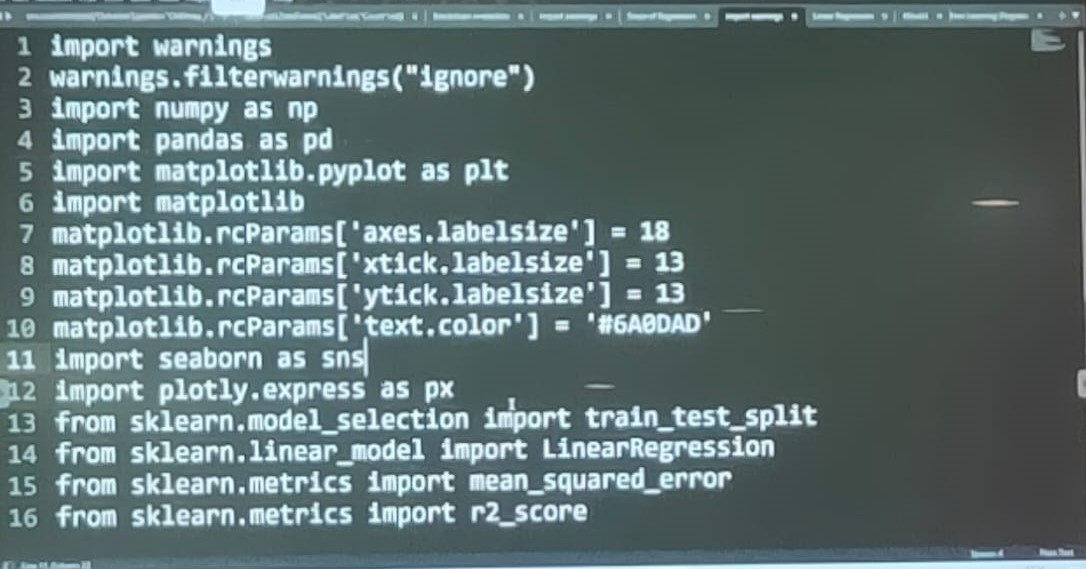

In [9]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.labelsize']=18
matplotlib.rcParams['xtick.labelsize']=13
matplotlib.rcParams['ytick.labelsize']=13
matplotlib.rcParams['text.color']='#6A0DAD'
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  #check error
from sklearn.metrics import r2_score  #check regression score


<b>Read USA Housing data<br>
Get the data information<br>
check the missing data and if missing data found clean the data<br> 
Data analysis<br>
Select final feature using correlation</b>

### Read USA HOUSING data

In [86]:
USAHOUSING_PATH2="../../DATASETS/ML_Training/USA_Housing.csv"

In [87]:
data=pd.read_csv(USAHOUSING_PATH2)
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### Get the data information

In [88]:
data.shape

(5000, 7)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [90]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### check the missing data and if missing data found clean the data 

In [91]:
data.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [92]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Data analysis

In [154]:
xp=data['Avg. Area House Age']
yp=data['Price']

In [155]:
df=pd.DataFrame({'Feature':xp,'Target':yp})
fig = px.bar(df,x='Feature',y='Target',color='Target',text="Target")
fig.show()

### Select final feature using correlation

In [93]:
corre=data.corr()
corre['Price']

Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Area Population                 0.408556
Price                           1.000000
Name: Price, dtype: float64

In [94]:
data.skew()

Avg. Area Income               -0.033720
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.040996
Avg. Area Number of Bedrooms    0.376240
Area Population                 0.050650
Price                          -0.002718
dtype: float64

### Using Univeriant Regression

In [126]:
xu=data['Avg. Area Income']
yu=data['Price']

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(xu,yu,test_size=0.2,random_state=32)

In [102]:
model=LinearRegression()
model.fit(np.array(X_train).reshape(-1,1),np.array(Y_train).reshape(-1,1))

LinearRegression()

In [104]:
predprice=model.predict(np.array(X_test).reshape(-1,1))

In [105]:
print("Model Score:",round(r2_score(np.array(Y_test).reshape(-1,1),predprice),2)*100,"%")

Model Score: 41.0 %


In [34]:
# x=data.drop(['Price'],axis=1)
# y=data['Price']

In [143]:
data.Address.value_counts().sum()

5000

### Prediction

In [225]:
xua=data.drop(['Price','Address'],axis=1)
yua=data['Price']
X_train,X_test,Y_train,Y_test=train_test_split(xua,yua,test_size=0.2,random_state=6)

print(X_train.shape," ",X_test.shape," ",Y_train.shape," ",Y_test.shape)

model=LinearRegression()
model.fit(X_train,Y_train)

predprice=model.predict(X_test)
print("\nModel Score:",round(r2_score(Y_test,predprice),2)*100,"%")

(4000, 5)   (1000, 5)   (4000,)   (1000,)

Model Score: 93.0 %


## Maximum accuracy at ? random_state

In [224]:
xua=data.drop(['Price','Address'],axis=1)
yua=data['Price']
idx=[]
val=[]
for i in range(10000):
   
    X_train,X_test,Y_train,Y_test=train_test_split(xua,yua,test_size=0.2,random_state=i)
    model=LinearRegression()
    model.fit(X_train,Y_train)

    predprice=model.predict(X_test)
    r2predacc=round(r2_score(Y_test,predprice),2)*100
    idx.append(i)
    val.append(r2predacc)

mxs=max(val)
id1=val.index(max(val))
print(idx[id1],":",val[id1])

6 : 93.0
